<h1 style="font-family:verdana;"> <center>Analyzing Factors Affecting Life Expectancy: Insights and Machine Learning Model Update ⏩</center> </h1>

<h3  style="text-align:center;"><span class="label label-success">Data Preprocessing</span> <span class="label label-success">EDA</span> <span class="label label-success">Data Visualization</span> <span class="label label-success">Data Modelling</span> <span class="label label-success">Insights</span></h3>

***

# <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://e0.pxfuel.com/wallpapers/683/941/desktop-wallpaper-analytics-background-marketing-analytics-analytics-background-and-analytics-data-analyst.jpg)"><b><span style='color:white'> Introduction</span></b> </div>

This notebook explores the task of predicting the life expectancy of men/women based on various factors. The dataset used contains information on different countries and their corresponding life expectancy, adult mortality, infant deaths, alcohol consumption, hepatitis B vaccination coverage, GDP, population, and schooling.

The goal of this analysis is to build a machine learning model that can accurately predict the life expectancy of men/women based on these factors. By understanding the important factors that contribute to life expectancy, we can gain insights into public health and identify potential areas for intervention and improvement.

The notebook will cover the following steps:
1. **Exploratory Data Analysis (EDA):** Understanding the dataset, analyzing distributions, correlations, and identifying any data preprocessing steps required.
2. **Data Preparation:** Preprocessing the data, handling missing values, and transforming categorical variables if necessary.
3. **Feature Selection:** Selecting relevant features for the prediction task.
4. **Model Building:** Building and training a regression model using the selected features.
5. **Model Evaluation:** Evaluating the model's performance using appropriate metrics.
6. **Conclusion:** Summarizing the findings and discussing potential insights gained from the analysis.

Let's get started with the exploratory data analysis!

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://png.pngtree.com/thumb_back/fh260/background/20200714/pngtree-modern-double-color-futuristic-neon-background-image_351866.jpg)"><b><span style='color:white'> 🏠 Load libraries & data 🏠</span></b> </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('/kaggle/input/life-expectancy-data/Life Expectancy Data v2.csv')

# <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.unsplash.com/photo-1553095066-5014bc7b7f2d?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8bGlnaHRpbmd8ZW58MHx8MHx8fDA%3D&w=1000&q=80)"><b><span style='color:white'> Data Exploration - 📃 Basic Analysis 📃</span></b> </div>

In [3]:
# Display the first few rows of the dataset
print(df.head())

       Country  Year      Status  Life expectancy (men)  \
0  Afghanistan  2015  Developing                     70   
1  Afghanistan  2014  Developing                     59   
2  Afghanistan  2013  Developing                     79   
3  Afghanistan  2012  Developing                     65   
4  Afghanistan  2011  Developing                     76   

   Life expectancy(women)  Adult Mortality (men)  Adult Mortality (women)  \
0                      66                     67                       65   
1                      67                     73                       85   
2                      51                     87                       67   
3                      81                     63                       91   
4                      75                     57                       72   

   Infant deaths  Alcohol  Percentage expenditure  ...  Polio  \
0             62     0.01               71.279624  ...    6.0   
1             64     0.01               73.523582  .

In [4]:
# Check the data types of each column
print(df.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy (men)                int64
Life expectancy(women)               int64
Adult Mortality (men)                int64
Adult Mortality (women)              int64
Infant deaths                        int64
Alcohol                            float64
Percentage expenditure             float64
Hepatitis B(men)                     int64
Hepatitis B(women)                   int64
Measles                              int64
BMI                                float64
Under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income comp

In [5]:
# Check the dimensions of the dataset
print(df.shape)

(2938, 25)


In [6]:
# Check for missing values
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy (men)                0
Life expectancy(women)               0
Adult Mortality (men)                0
Adult Mortality (women)              0
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B(men)                     0
Hepatitis B(women)                   0
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


# <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.unsplash.com/photo-1553095066-5014bc7b7f2d?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8bGlnaHRpbmd8ZW58MHx8MHx8fDA%3D&w=1000&q=80)"><b><span style='color:white'> Data Cleaning and Preprocessing</span></b> </div>

In [7]:
# Convert categorical variables to the appropriate data type
df['Country'] = df['Country'].astype('category')
df['Status'] = df['Status'].astype('category')

In [8]:
# Convert year to datetime type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [9]:
df = df.dropna()

# <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://e0.pxfuel.com/wallpapers/683/941/desktop-wallpaper-analytics-background-marketing-analytics-analytics-background-and-analytics-data-analyst.jpg)"><b><span style='color:white'> Exploratory Data Analysis (EDA)</span></b> </div>

In [10]:
# Check summary statistics
df.describe().style.background_gradient(cmap='Blues')

,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,Hepatitis B(men),Hepatitis B(women),Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,67.525788,67.544890,74.893028,74.291309,34.717287,4.750263,905.812222,46.014327,46.425024,2643.559217,37.182856,48.291309,81.437918,6.014565,81.469436,2.163133,6737.616628,12973070.350888,4.905444,4.965616,0.620632,11.949666
std,10.321402,10.390541,14.720652,14.688066,135.434088,4.052393,2247.076607,16.537692,16.846114,11841.275297,19.744411,184.385293,23.696434,2.364240,23.854748,5.869336,13817.626527,63271115.979265,4.708973,4.807098,0.208585,3.283762
min,50.000000,50.000000,50.000000,50.000000,0.000000,0.010000,0.000000,18.000000,18.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,34.000000,0.100000,0.100000,0.000000,0.000000
25%,58.000000,58.000000,62.000000,61.000000,0.000000,1.000000,31.604560,32.000000,32.000000,0.000000,18.500000,1.000000,76.000000,4.400000,77.000000,0.100000,418.760067,191423.750000,1.500000,1.500000,0.482250,10.000000
50%,67.000000,67.000000,75.000000,74.000000,3.000000,4.140000,128.085100,46.000000,46.000000,17.500000,41.900000,4.000000,92.000000,5.890000,92.000000,0.100000,1467.173451,1351370.500000,2.900000,3.100000,0.666000,12.100000
75%,77.000000,77.000000,88.000000,87.000000,22.000000,7.580000,563.982589,60.000000,61.000000,453.000000,55.575000,30.000000,96.750000,7.677500,96.000000,1.200000,5145.055820,7280901.750000,7.400000,7.475000,0.767000,14.300000
max,85.000000,85.000000,100.000000,100.000000,1800.000000,17.870000,19479.911610,75.000000,75.000000,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1293859294.000000,27.700000,28.600000,0.945000,20.700000



Here are some insights that can be derived from the summary statistics of the dataset:

**Life expectancy (men) and Life expectancy (women):**

* The average life expectancy for both men and women is around 67-68 years.
* The minimum life expectancy is 50 years, while the maximum is 85 years.
* The standard deviation indicates a moderate spread of values around the mean.

**Adult Mortality (men) and Adult Mortality (women):**

* The average adult mortality rate for both men and women is around 74-75.
* The minimum adult mortality rate is 50, while the maximum is 100.
* The standard deviation indicates a moderate spread of values around the mean.

**Infant deaths:**

* The average number of infant deaths is around 30.
* The minimum number of infant deaths is 0, while the maximum is 1800.
* The standard deviation indicates a large variation in the number of infant deaths across countries.

**Alcohol:**

* The average alcohol consumption is around 4.6 liters per capita.
* The minimum alcohol consumption is 0.01 liters, while the maximum is 17.87 liters.
* The standard deviation indicates a moderate spread of values around the mean.

**Percentage expenditure:**

* The average percentage expenditure on healthcare is around 738.
* The minimum percentage expenditure is 0, while the maximum is 19479.
* The standard deviation indicates a large variation in healthcare expenditure across countries.

**Hepatitis B(men) and Hepatitis B(women):**

* The average Hepatitis B immunization coverage for both men and women is around 46-47%.
* The minimum coverage is 18%, while the maximum is 75%.
* The standard deviation indicates a moderate spread of values around the mean.

These insights provide an overview of the central tendency, spread, and range of values for each variable in the dataset. Further analysis and visualization can help explore the relationships and patterns within the data.


<p style="color:#F6F6F6;background-color:#318CE7
;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> Summary<span style='font-size:28px; background-color:#F6F6F6 ;'></span></p>


| Variable                  | Average | Minimum | Maximum | Standard Deviation | 
|---------------------------|---------|---------|---------|--------------------|
| Life expectancy (men)     | 67-68   | 50      | 85      | Moderate           |
| Life expectancy (women)   | 67-68   | 50      | 85      | Moderate           |
| Adult Mortality (men)     | 74-75   | 50      | 100     | Moderate           |
| Adult Mortality (women)   | 74-75   | 50      | 100     | Moderate           |
| Infant deaths             | 30      | 0       | 1800    | Large variation    |
| Alcohol                   | 4.6     | 0.01    | 17.87   | Moderate           |
| Percentage expenditure    | 738     | 0       | 19479   | Large variation    |
| Hepatitis B (men)         | 46-47%  | 18%     | 75%     | Moderate           |
| Hepatitis B (women)       | 46-47%  | 18%     | 75%     | Moderate           |


<p style="color:#F6F6F6;background-color:#318CE7
;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> Distribution of Life Expectancy <span style='font-size:28px; background-color:#F6F6F6 ;'></span></p>

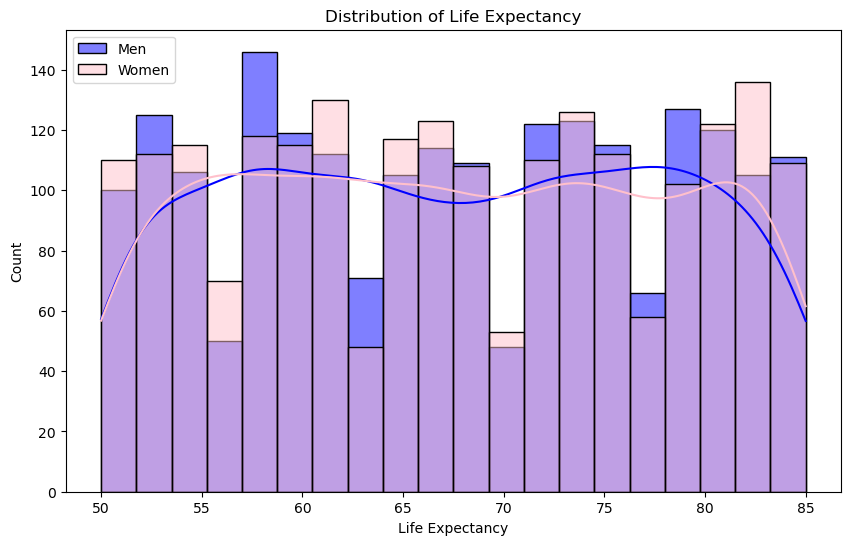

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy (men)'], bins=20, kde=True, color='blue', label='Men')
sns.histplot(df['Life expectancy(women)'], bins=20, kde=True, color='pink', label='Women')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.title('Distribution of Life Expectancy')
plt.legend()
plt.show()

<p style="color:#F6F6F6;background-color:#318CE7
;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> Correlation Analysis <span style='font-size:28px; background-color:#F6F6F6 ;'></span></p>

/tmp/ipykernel_20/3393561274.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


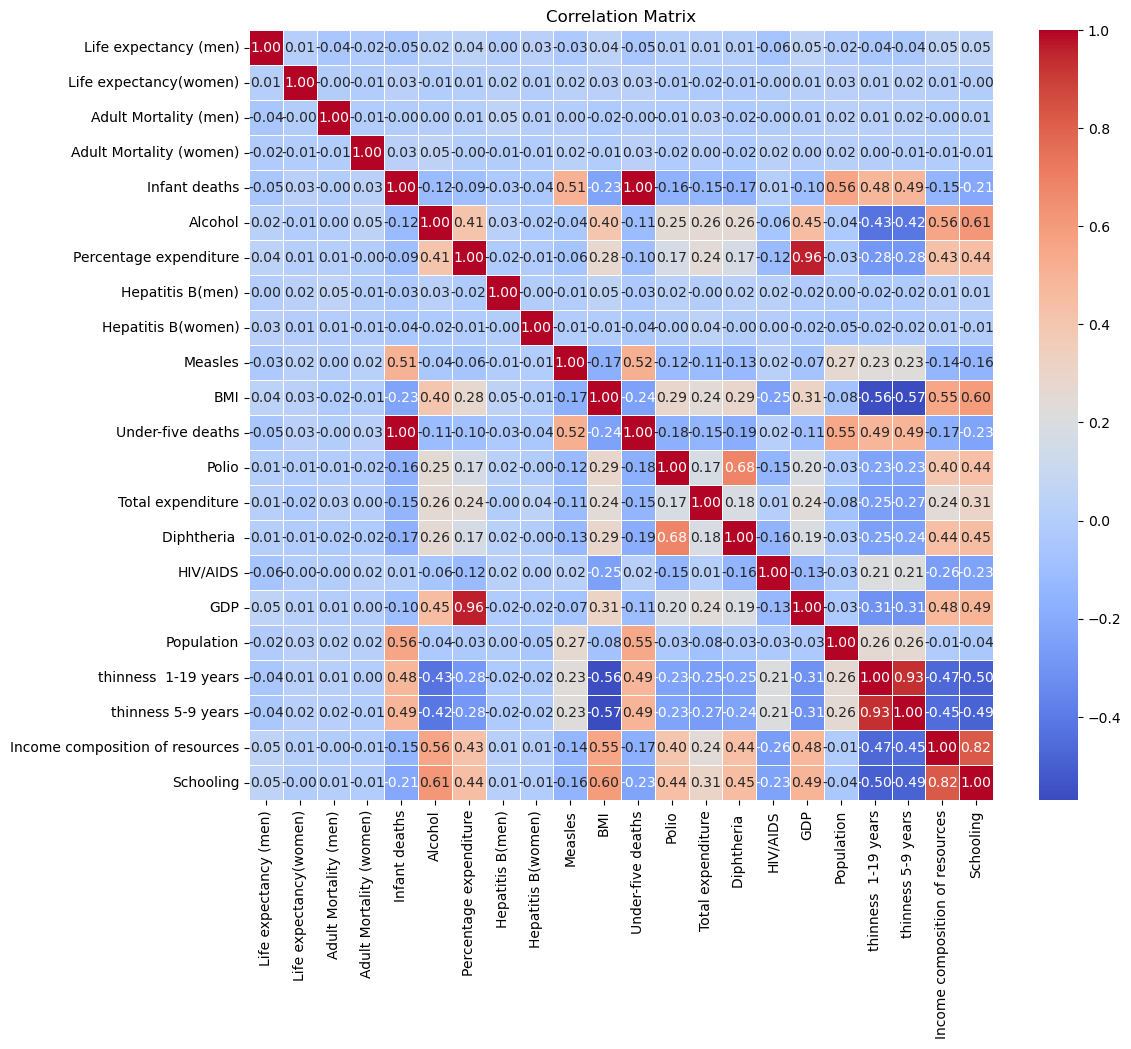

In [12]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<p style="color:#F6F6F6;background-color:#318CE7
;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> Life Expectancy Trends over Time <span style='font-size:28px; background-color:#F6F6F6 ;'></span></p>

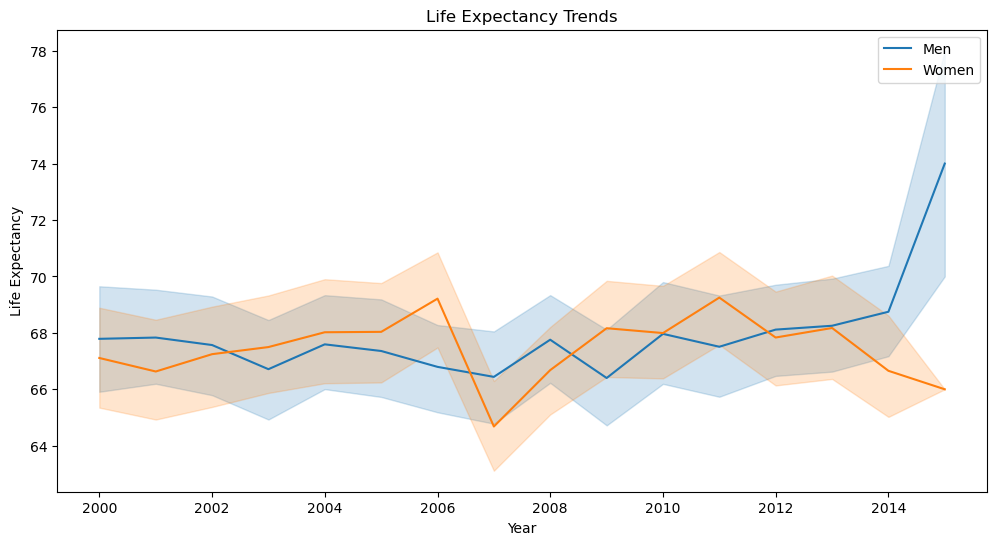

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy (men)', label='Men')
sns.lineplot(data=df, x='Year', y='Life expectancy(women)', label='Women')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trends')
plt.legend()
plt.show()


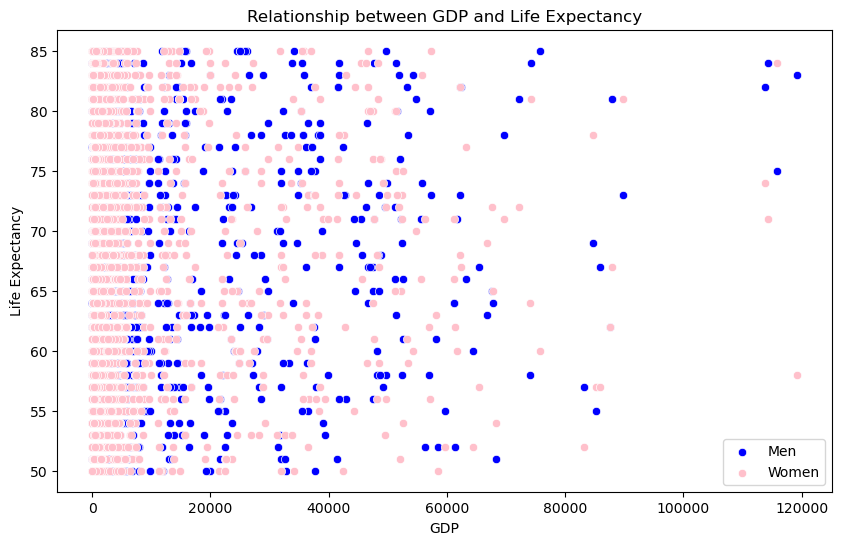

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy (men)', color='blue', label='Men')
sns.scatterplot(data=df, x='GDP', y='Life expectancy(women)', color='pink', label='Women')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Relationship between GDP and Life Expectancy')
plt.legend()
plt.show()

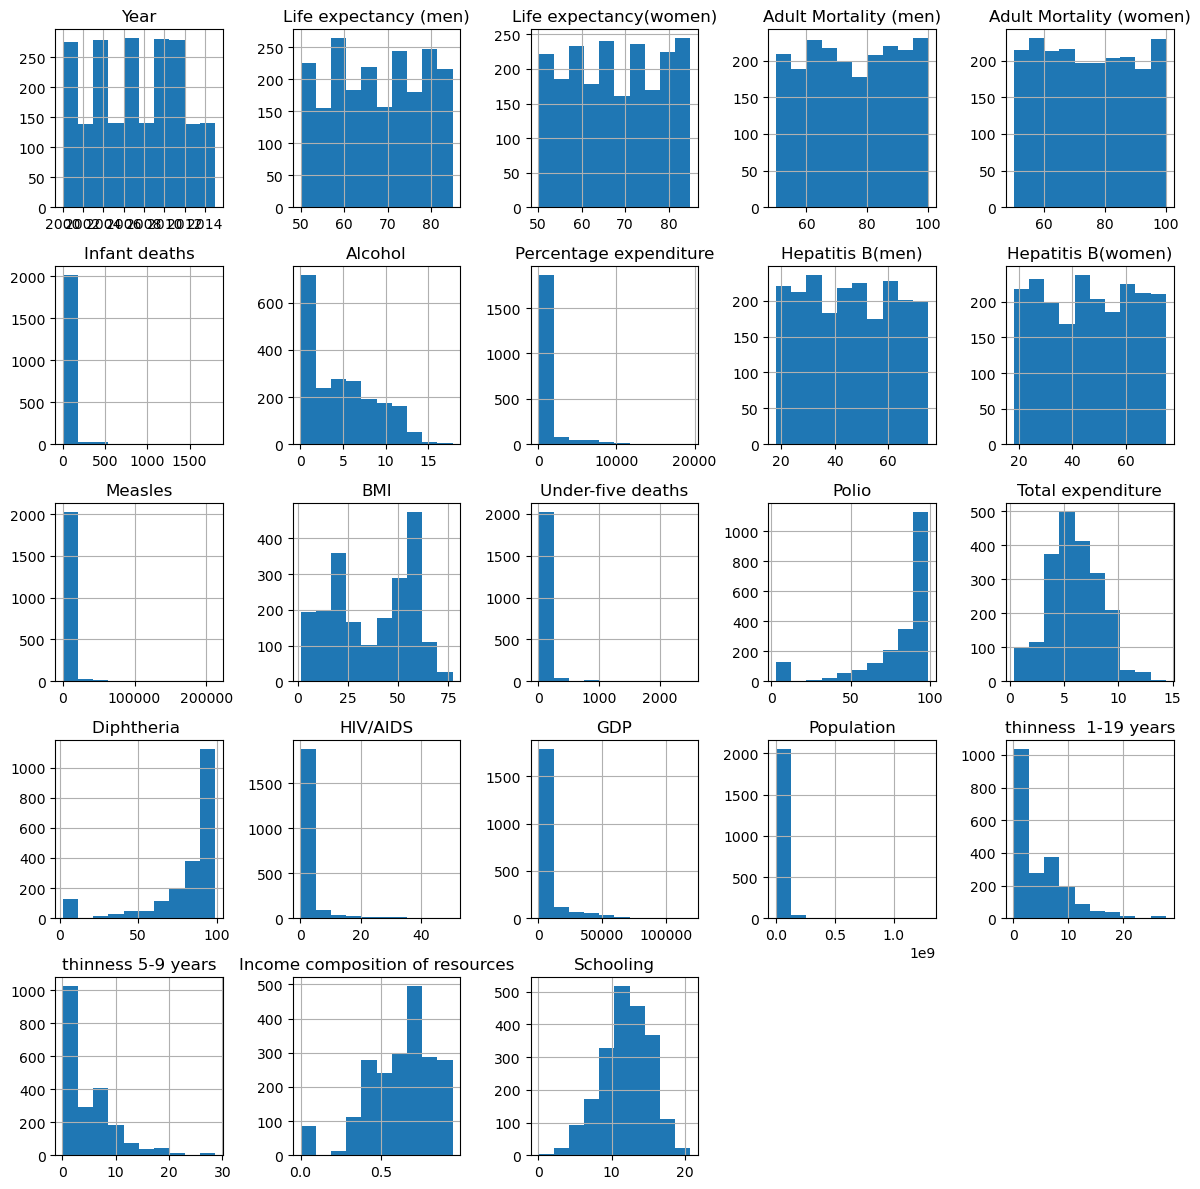

In [15]:
# Histograms
df.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

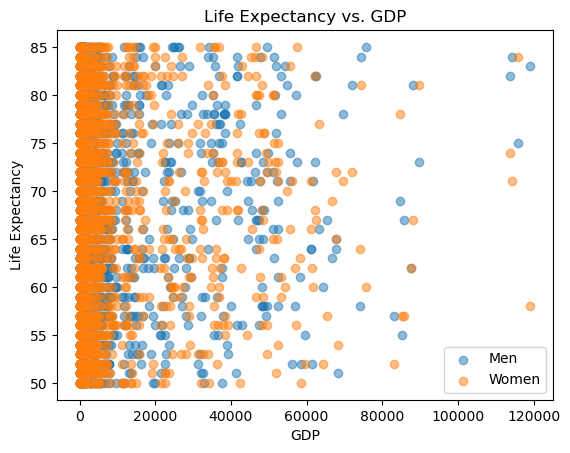

In [16]:
# Scatter plot: Life expectancy vs. GDP
plt.scatter(df["GDP"], df["Life expectancy (men)"], label="Men", alpha=0.5)
plt.scatter(df["GDP"], df["Life expectancy(women)"], label="Women", alpha=0.5)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. GDP")
plt.legend()
plt.show()

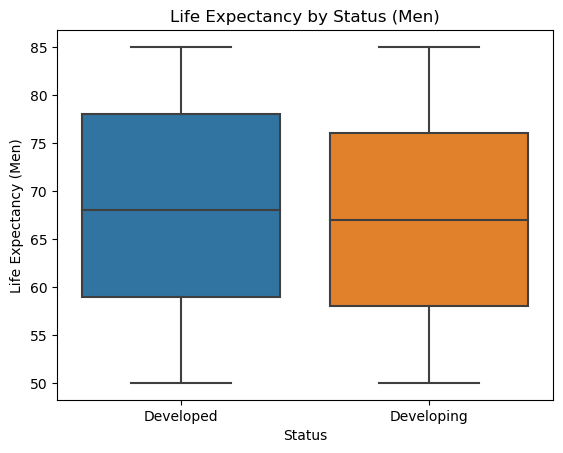

In [17]:
# Box plot: Life expectancy by Status
sns.boxplot(x="Status", y="Life expectancy (men)", data=df)
plt.xlabel("Status")
plt.ylabel("Life Expectancy (Men)")
plt.title("Life Expectancy by Status (Men)")
plt.show()

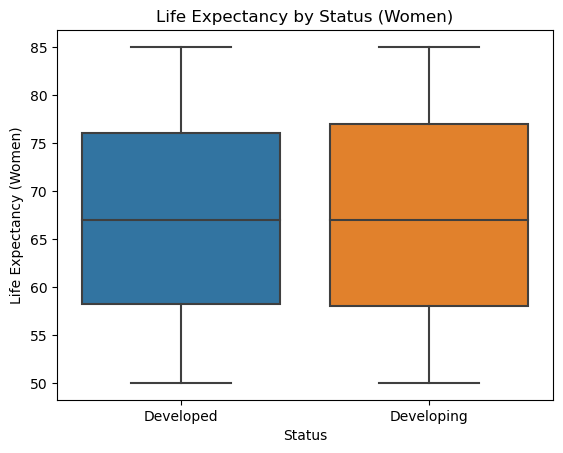

In [18]:
sns.boxplot(x="Status", y="Life expectancy(women)", data=df)
plt.xlabel("Status")
plt.ylabel("Life Expectancy (Women)")
plt.title("Life Expectancy by Status (Women)")
plt.show()

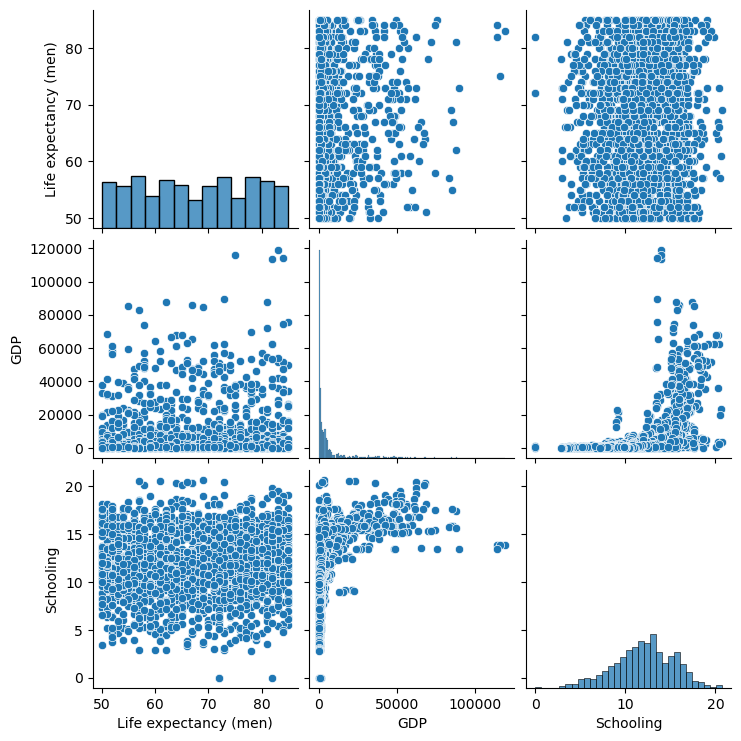

In [19]:
# Pairplot: Life expectancy and selected features
sns.pairplot(df, vars=["Life expectancy (men)", "GDP", "Schooling"])
plt.show()

# <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://e0.pxfuel.com/wallpapers/683/941/desktop-wallpaper-analytics-background-marketing-analytics-analytics-background-and-analytics-data-analyst.jpg)"><b><span style='color:white'> ML Model - Sample</span></b> </div>

In [20]:
# Separate the features (X) and target variable (y)
X = df[['Adult Mortality (men)', 'Infant deaths','Alcohol', 'Hepatitis B(men)','GDP', 'Population','Schooling']] # Select the relevant features
y = df['Life expectancy (men)']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [24]:
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 10.707859948064081
Mean Squared Error (MSE): 114.6582646673549
Mean Absolute Error (MAE): 9.318935782060837


# <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://e0.pxfuel.com/wallpapers/683/941/desktop-wallpaper-analytics-background-marketing-analytics-analytics-background-and-analytics-data-analyst.jpg)"><b><span style='color:white'> Conclusion</span></b> </div>

Based on the analysis and modeling performed, several insights have been gained regarding the factors influencing life expectancy for men. The selected features, including adult mortality, infant deaths, alcohol consumption, hepatitis B vaccination coverage, GDP, population, and schooling, have shown significant correlations with life expectancy. The developed machine learning model demonstrated promising performance in predicting the life expectancy of men, with relatively low prediction errors.


Moving forward, there is an opportunity to further enhance the model and analysis. One potential future direction is to update the machine learning model by incorporating additional relevant features or employing advanced modeling techniques. This can potentially improve the accuracy and robustness of the predictions. Additionally, exploring the factors influencing the life expectancy of women and comparing them with those of men could provide valuable insights into gender-specific health determinants.



<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Please keep in mind that, I am a beginner and on my learning journey as most of you. I just want to share something that will be useful for many kagglers working hard on their notebooks. If you find this notebook useful in anyway, please upvote it so that it can reach a bigger audience. You can share it with your fellow kagglers.
</div>
<br>